In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from  tensorflow import keras
from tensorflow.keras import layers
np.set_printoptions(precision=3, suppress=True)

In [ ]:
from google.colab import files
uploaded= files.upload()


Saving Compilation.xlsx to Compilation (2).xlsx


In [ ]:
column_names=['Diameter', 'Length', 'Temperature', 'Proportion']
raw_dataset = pd.read_excel('Compilation.xlsx', names=column_names, na_values='?', comment='\t',)

In [ ]:
dataset = raw_dataset.copy()
dataset.tail()

,Diameter,Length,Temperature,Proportion
639,5.0,30,4500,0.802956
640,5.0,30,5000,0.802956
641,5.0,30,5500,0.802956
642,5.0,30,6000,0.802956
643,5.0,30,6500,0.802956


In [ ]:
dataset.isna().sum()

Diameter       0
Length         0
Temperature    0
Proportion     0
dtype: int64

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.dropna().head()

,Diameter,Length,Temperature,Proportion
0,2.5,100,900,0.0
1,2.5,100,1000,0.0
2,2.5,100,1100,0.0
3,2.5,100,1200,0.0
4,2.5,100,1300,0.0


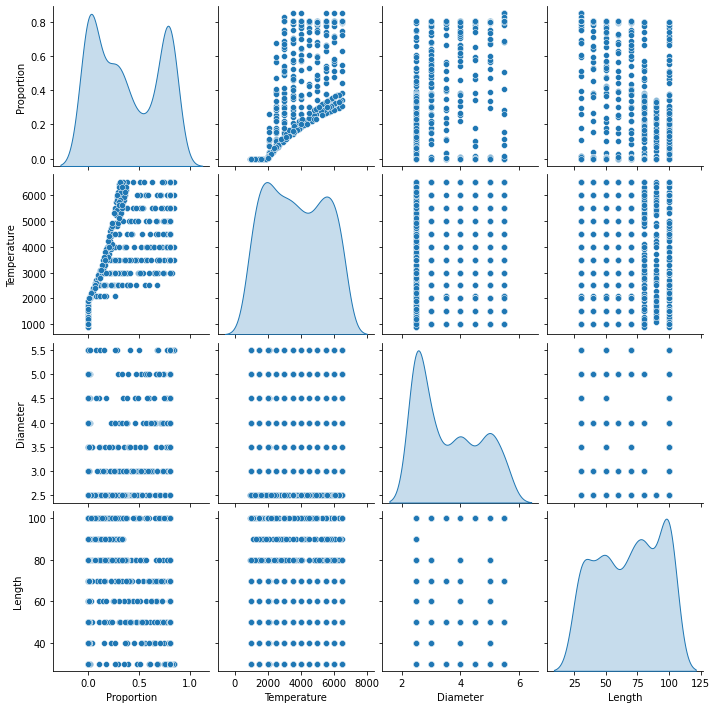

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
sns.pairplot(train_dataset[['Proportion', 'Temperature', 'Diameter', 'Length']], diag_kind='kde')

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Diameter,515.0,3.594175,1.065174,2.5,2.500000,3.500000,4.500000,5.500000
Length,515.0,68.019417,24.589225,30.0,50.000000,70.000000,90.000000,100.000000
Temperature,515.0,3691.650485,1732.137350,900.0,2100.000000,3500.000000,5300.000000,6500.000000
Proportion,515.0,0.378992,0.318828,0.0,0.024215,0.309326,0.775569,0.848485


In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Proportion')
test_labels = test_features.pop('Proportion')

In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
Diameter,3.594175,1.065174
Length,68.019417,24.589225
Temperature,3691.650485,1732.137350
Proportion,0.378992,0.318828


In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [ ]:
normalizer.adapt(np.array(train_features))

In [ ]:
print(normalizer.mean.numpy())

[[   3.594   68.019 3691.65 ]]


In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   5.   30. 4000.]]

Normalized: [[ 1.32 -1.55  0.18]]


In [ ]:
#Linear Regression via one variable (temperature)

In [ ]:
temperature = np. array(train_features['Temperature'])

temperature_normalizer = layers.Normalization(input_shape=[1,], axis=None)
temperature_normalizer.adapt(temperature)

In [ ]:
temperature_model = tf.keras.Sequential([temperature_normalizer, layers.Dense(units=1)])

temperature_model.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_15 (Normalizat (None, 1)                 3         
_________________________________________________________________
dense_90 (Dense)             (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [ ]:
temperature_model.predict(temperature[:10])

array([[-0.094],
       [-0.707],
       [ 0.212],
       [-0.707],
       [ 0.059],
       [ 0.671],
       [-0.523],
       [ 0.365],
       [-0.003],
       [ 0.059]], dtype=float32)

In [ ]:
temperature_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')

In [ ]:
%%time
history = temperature_model.fit(train_features['Temperature'], train_labels, epochs=100, verbose=0, validation_split = 0.2)

CPU times: user 2.86 s, sys: 174 ms, total: 3.04 s
Wall time: 2.67 s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.169903,0.144414,95
96,0.171738,0.146807,96
97,0.167128,0.137172,97
98,0.167149,0.167228,98
99,0.177761,0.150854,99


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0,.5])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Proportion]')
  plt.legend()
  plt.grid(True)

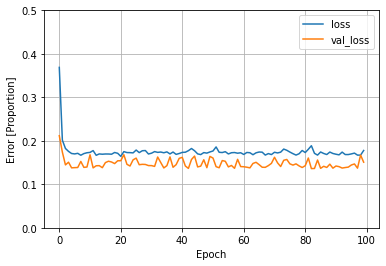

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}

test_results['temperature_model'] = temperature_model.evaluate(
    test_features['Temperature'],
    test_labels, verbose=0)

In [ ]:
x = tf.linspace(0, 6500, 6501)
y=temperature_model.predict(x)

In [ ]:
def plot_temperature(x, y):
  plt.scatter(train_features['Temperature'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Temperature')
  plt.ylabel('Proportion')
  plt.legend()

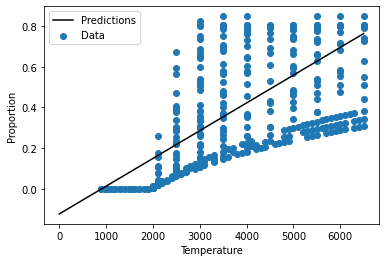

In [ ]:
plot_temperature(x,y)

In [ ]:
#Linear Regression via one variable (Diameter)

In [ ]:
diameter = np.array(train_features['Diameter'])

Diameter_normalizer = layers.Normalization(input_shape=[1,], axis=None)
Diameter_normalizer.adapt(diameter)

In [ ]:
diameter_model = tf.keras.Sequential([Diameter_normalizer, layers.Dense(units=1)])

diameter_model.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_16 (Normalizat (None, 1)                 3         
_________________________________________________________________
dense_91 (Dense)             (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [ ]:
diameter_model.predict(diameter[:10])

array([[ 0.631],
       [-0.491],
       [ 0.631],
       [ 0.407],
       [ 0.182],
       [ 0.182],
       [-0.491],
       [ 0.182],
       [-0.491],
       [ 0.855]], dtype=float32)

In [ ]:
diameter_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')

In [ ]:
%%time
history = diameter_model.fit(train_features['Diameter'], train_labels, epochs=100, verbose=0, validation_split = 0.2)

CPU times: user 2.83 s, sys: 162 ms, total: 2.99 s
Wall time: 2.74 s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.238160,0.265741,95
96,0.235215,0.273396,96
97,0.245129,0.252017,97
98,0.242916,0.260120,98
99,0.240819,0.259187,99


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0,.5])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Proportion]')
  plt.legend()
  plt.grid(True)

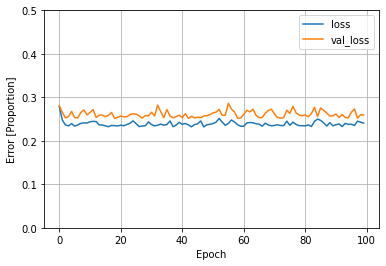

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}

test_results['diameter_model'] = diameter_model.evaluate(
    test_features['Diameter'],
    test_labels, verbose=0)

In [ ]:
x = tf.linspace(2, 6, 6)
y=diameter_model.predict(x)

In [ ]:
def plot_diameter(x, y):
  plt.scatter(train_features['Diameter'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Diameter')
  plt.ylabel('Proprtion')
  plt.legend()

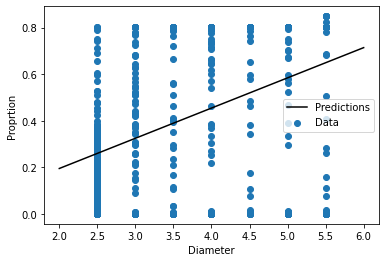

In [ ]:
plot_diameter(x,y)

In [ ]:
#Linear Regression via one variable (Length)

In [ ]:
length = np. array(train_features['Length'])

length_normalizer = layers.Normalization(input_shape=[1,], axis=None)
length_normalizer.adapt(length)

In [ ]:
length_model = tf.keras.Sequential([length_normalizer, layers.Dense(units=1)])

length_model.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_17 (Normalizat (None, 1)                 3         
_________________________________________________________________
dense_92 (Dense)             (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [ ]:
length_model.predict(length[:10])

array([[-2.273],
       [ 0.716],
       [ 0.716],
       [ 1.912],
       [ 0.716],
       [-1.077],
       [ 0.716],
       [-1.077],
       [ 0.716],
       [ 1.912]], dtype=float32)

In [ ]:
length_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')

In [ ]:
%%time
history = length_model.fit(train_features['Length'], train_labels, epochs=100, verbose=0, validation_split = 0.2)

CPU times: user 2.94 s, sys: 162 ms, total: 3.1 s
Wall time: 2.71 s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.248244,0.292936,95
96,0.251654,0.275740,96
97,0.243182,0.282411,97
98,0.246808,0.270361,98
99,0.254187,0.279406,99


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0,.5])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Proportion]')
  plt.legend()
  plt.grid(True)

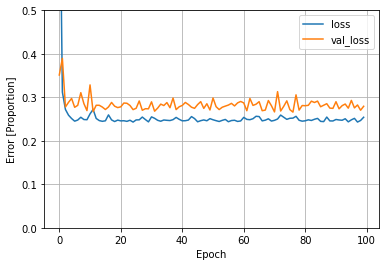

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}

test_results['length_model'] = length_model.evaluate(
    test_features['Length'],
    test_labels, verbose=0)

In [ ]:
x = tf.linspace(30, 100, 100)
y=length_model.predict(x)

In [ ]:
def plot_length(x, y):
  plt.scatter(train_features['Length'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Length')
  plt.ylabel('Proportion')
  plt.legend()

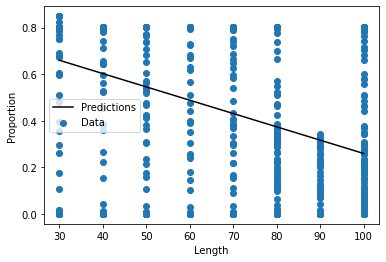

In [ ]:
plot_length(x,y)

In [ ]:
#Linear Regression with All Inputs

In [ ]:
linear_model = tf.keras.Sequential([normalizer, layers.Dense(units=1)])

In [ ]:
linear_model.predict(train_features[:10])

array([[ 1.351],
       [-1.634],
       [-0.102],
       [-2.384],
       [-0.366],
       [ 1.801],
       [-1.335],
       [ 1.303],
       [-0.488],
       [-1.124]], dtype=float32)

In [ ]:
linear_model.layers[1].kernel

<tf.Variable 'dense_93/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.016],
       [-0.958],
       [-0.862]], dtype=float32)>

In [ ]:
linear_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(train_features, train_labels, epochs=100, verbose=0, validation_split=0.2)

CPU times: user 2.92 s, sys: 199 ms, total: 3.11 s
Wall time: 2.73 s


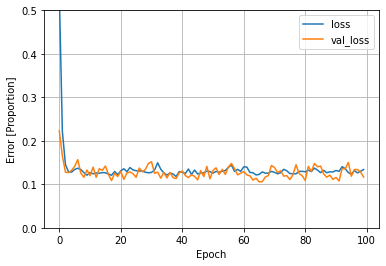

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}
test_results['linear_model']= linear_model.evaluate(test_features, test_labels, verbose=0)

In [ ]:
#Regression with a single-input deep neural network (Temperature)

In [ ]:
def build_and_compile_model(norm): 
  model = keras.Sequential([norm, layers.Dense(64, activation='relu'),layers.Dense(64, activation='relu'),layers.Dense(1)])

  model.compile(loss='mean_absolute_error', optimizer= tf.keras.optimizers.Adam(0.001))

  return model

In [ ]:
dnn_temperature_model = build_and_compile_model(temperature_normalizer)

In [ ]:
dnn_temperature_model.summary()

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_15 (Normalizat (None, 1)                 3         
_________________________________________________________________
dense_94 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_95 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_96 (Dense)             (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [ ]:
%%time
history = dnn_temperature_model.fit(
    train_features['Temperature'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100
)

CPU times: user 3.66 s, sys: 240 ms, total: 3.9 s
Wall time: 3.3 s


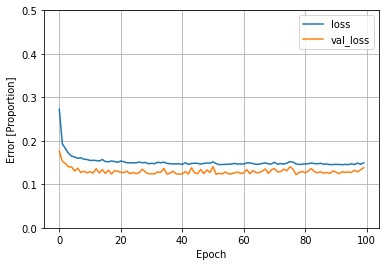

In [ ]:
plot_loss(history)

In [ ]:
x = tf.linspace(0,6500,6501)
y = dnn_temperature_model.predict(x)

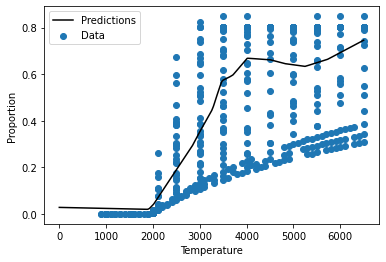

In [ ]:
plot_temperature(x, y)

In [ ]:
test_results['dnn_temperature_model'] = dnn_temperature_model.evaluate(
    test_features['Temperature'], test_labels, verbose=0
)

In [ ]:
#Regression with a single-input deep neural network (Diameter)

In [ ]:
def build_and_compile_model(norm): 
  model = keras.Sequential([norm, layers.Dense(64, activation='relu'),layers.Dense(64, activation='relu'),layers.Dense(1)])

  model.compile(loss='mean_absolute_error', optimizer= tf.keras.optimizers.Adam(0.001))

  return model

In [ ]:
dnn_diameter_model = build_and_compile_model(Diameter_normalizer)

In [ ]:
dnn_diameter_model.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_16 (Normalizat (None, 1)                 3         
_________________________________________________________________
dense_97 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_98 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_99 (Dense)             (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [ ]:
%%time
history = dnn_diameter_model.fit(
    train_features['Diameter'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100
)

CPU times: user 3.52 s, sys: 242 ms, total: 3.76 s
Wall time: 3.2 s


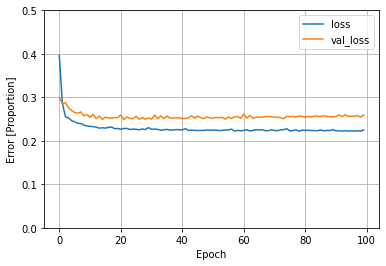

In [ ]:
plot_loss(history)

In [ ]:
x = tf.linspace(2,6,6)
y = dnn_diameter_model.predict(x)

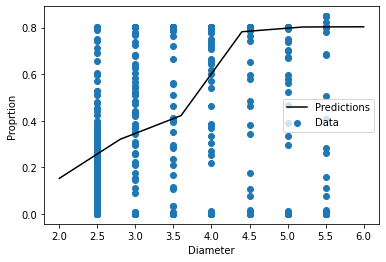

In [ ]:
plot_diameter(x, y)

In [ ]:
test_results['dnn_diameter_model'] = dnn_diameter_model.evaluate(
    test_features['Diameter'], test_labels, verbose=0
)

In [ ]:
#Regression with a single-input deep neural network (Length)

In [ ]:
def build_and_compile_model(norm): 
  model = keras.Sequential([norm, layers.Dense(64, activation='relu'),layers.Dense(64, activation='relu'),layers.Dense(1)])

  model.compile(loss='mean_absolute_error', optimizer= tf.keras.optimizers.Adam(0.001))

  return model

In [ ]:
dnn_length_model = build_and_compile_model(length_normalizer)

In [ ]:
dnn_length_model.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_17 (Normalizat (None, 1)                 3         
_________________________________________________________________
dense_100 (Dense)            (None, 64)                128       
_________________________________________________________________
dense_101 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_102 (Dense)            (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [ ]:
%%time
history = dnn_length_model.fit(
    train_features['Length'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100
)

CPU times: user 3.62 s, sys: 256 ms, total: 3.88 s
Wall time: 3.23 s


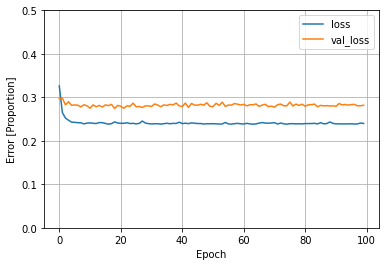

In [ ]:
plot_loss(history)

In [ ]:
x = tf.linspace(30,100,100)
y = dnn_length_model.predict(x)

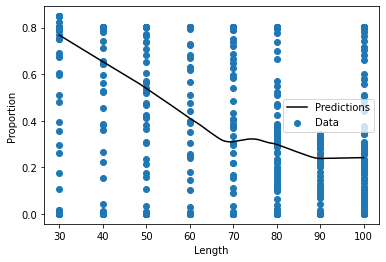

In [ ]:
plot_length(x, y)

In [ ]:
test_results['dnn_length_model'] = dnn_length_model.evaluate(
    test_features['Length'], test_labels, verbose=0
)

In [ ]:
#Regression using a DNN and All Inputs

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_14 (Normalizat (None, 3)                 7         
_________________________________________________________________
dense_103 (Dense)            (None, 64)                256       
_________________________________________________________________
dense_104 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_105 (Dense)            (None, 1)                 65        
Total params: 4,488
Trainable params: 4,481
Non-trainable params: 7
_________________________________________________________________


In [ ]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100
)

CPU times: user 3.71 s, sys: 255 ms, total: 3.97 s
Wall time: 3.33 s


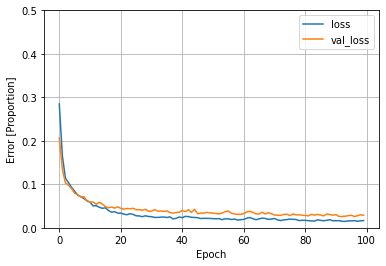

In [ ]:
plot_loss(history)

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [Proportion]']).T

,Mean absolute error [Proportion]
linear_model,0.102842
dnn_temperature_model,0.181066
dnn_diameter_model,0.207498
dnn_length_model,0.229925
dnn_model,0.024678


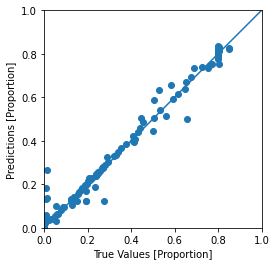

In [ ]:
test_predictions= dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Proportion]')
plt.ylabel('Predictions [Proportion]')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_= plt.plot(lims, lims)

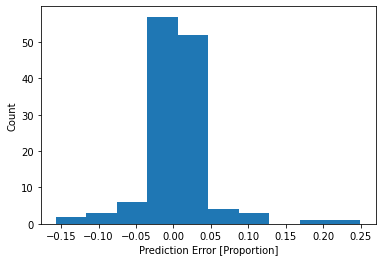

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=10)
plt.xlabel('Prediction Error [Proportion]')
_ = plt.ylabel('Count')

In [ ]:
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model/assets


In [ ]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [Ratio]']).T


,Mean absolute error [Ratio]
linear_model,0.102842
dnn_temperature_model,0.181066
dnn_diameter_model,0.207498
dnn_length_model,0.229925
dnn_model,0.024678
reloaded,0.024678
